                   timestamp  price  \
0 2025-03-14 18:53:27.897540   3021   
1 2025-03-14 18:54:01.318208   2792   
2 2025-03-14 18:54:34.523503   2207   
3 2025-03-14 18:55:07.668819   2300   
4 2025-03-14 18:55:40.372797   3021   

                                                 url destination source  \
0  https://www.kayak.com.br/flights/ORY-FLN/2025-...     ORY-FLN  Kayak   
1  https://www.kayak.com.br/flights/ORY-SAO/2025-...     ORY-SAO  Kayak   
2  https://www.kayak.com.br/flights/MAD-SAO/2025-...     MAD-SAO  Kayak   
3  https://www.kayak.com.br/flights/MAD-FLN/2025-...     MAD-FLN  Kayak   
4  https://www.kayak.com.br/flights/ORY-FLN/2025-...     ORY-FLN  Kayak   

  data_viagem  
0  2025-09-03  
1  2025-09-03  
2  2025-09-03  
3  2025-09-03  
4  2025-09-04  


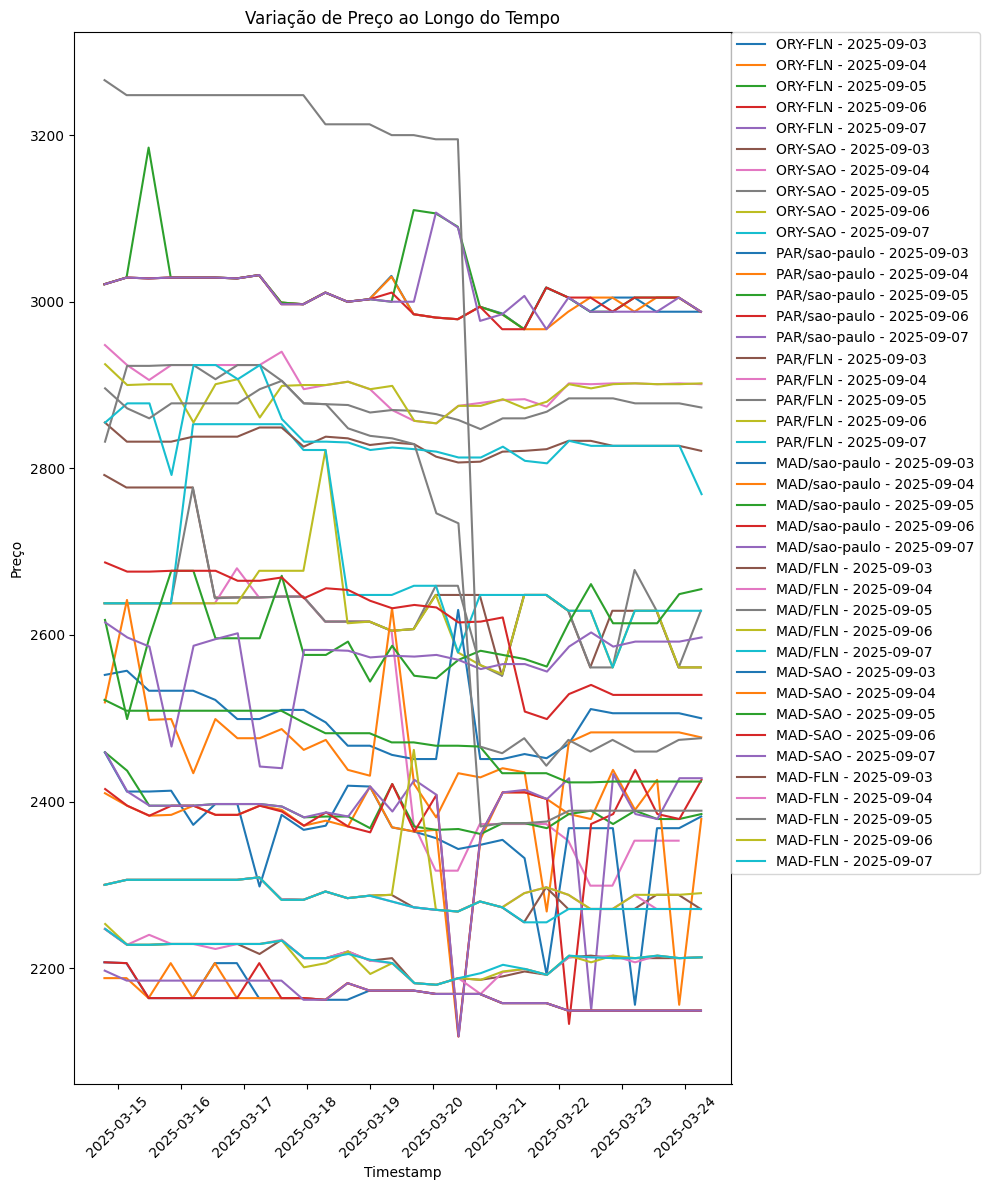

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dois arquivos CSV
kayak_df = pd.read_csv('euro_volta_kayak.csv') 
skiplagged_df = pd.read_csv('euro_volta_skip.csv')  


# Adicionar uma coluna para identificar a origem dos dados
kayak_df['source'] = 'Kayak'
skiplagged_df['source'] = 'Skiplagged'

# Função para extrair a data de viagem da URL
def extrair_data_viagem(url: str) -> str:
    """
    Função para extrair a data de viagem da URL dependendo do site.
    Para o Kayak, a data está no formato 'YYYY-MM-DD' após o destino.
    Para o Skiplagged, a data está no final da URL.
    """
    if "kayak" in url:
        # Para Kayak: A data está após o destino e antes do parâmetro '?'
        return url.split('/')[-1].split('?')[0]  # Remove o parâmetro ?sort=price_a
    elif "skiplagged" in url:
        # Para Skiplagged: A data está no final da URL
        return url.split('/')[-1]
    return None

# Adicionar uma coluna de data de viagem
kayak_df['data_viagem'] = kayak_df['url'].apply(extrair_data_viagem)
skiplagged_df['data_viagem'] = skiplagged_df['url'].apply(extrair_data_viagem)

# Unir os dois dataframes
combined_df = pd.concat([kayak_df, skiplagged_df], ignore_index=True)

# Garantir que as colunas de 'timestamp' sejam do tipo datetime
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Filtrar pelos destinos de interesse
destinos = ['ORY-FLN', 'ORY-SAO', 'PAR/sao-paulo', 'PAR/FLN', "MAD/sao-paulo", "MAD/FLN", "MAD-SAO", "MAD-FLN"]
combined_df = combined_df[combined_df['destination'].isin(destinos)]

print(combined_df.head())

# Plotar o gráfico
plt.figure(figsize=(10, 12))

# Plotar cada destino e data com uma linha diferente
for destino in destinos:
    for data_viagem in combined_df['data_viagem'].unique():
        # Filtrar os dados para o destino e a data atual
        destino_data_df = combined_df[(combined_df['destination'] == destino) & (combined_df['data_viagem'] == data_viagem)]
        
        # Plotar a variação de preço ao longo do tempo
        plt.plot(destino_data_df['timestamp'], destino_data_df['price'], label=f'{destino} - {data_viagem}')

# Adicionar título e rótulos aos eixos
plt.title('Variação de Preço ao Longo do Tempo')
plt.xlabel('Timestamp')
plt.ylabel('Preço')

# Ajustar a posição da legenda para fora do gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

# Exibir o gráfico
plt.xticks(rotation=45)  # Rotacionar os ticks do eixo x para melhor visualização
plt.tight_layout()  # Ajustar para não sobrepor os labels
plt.show()

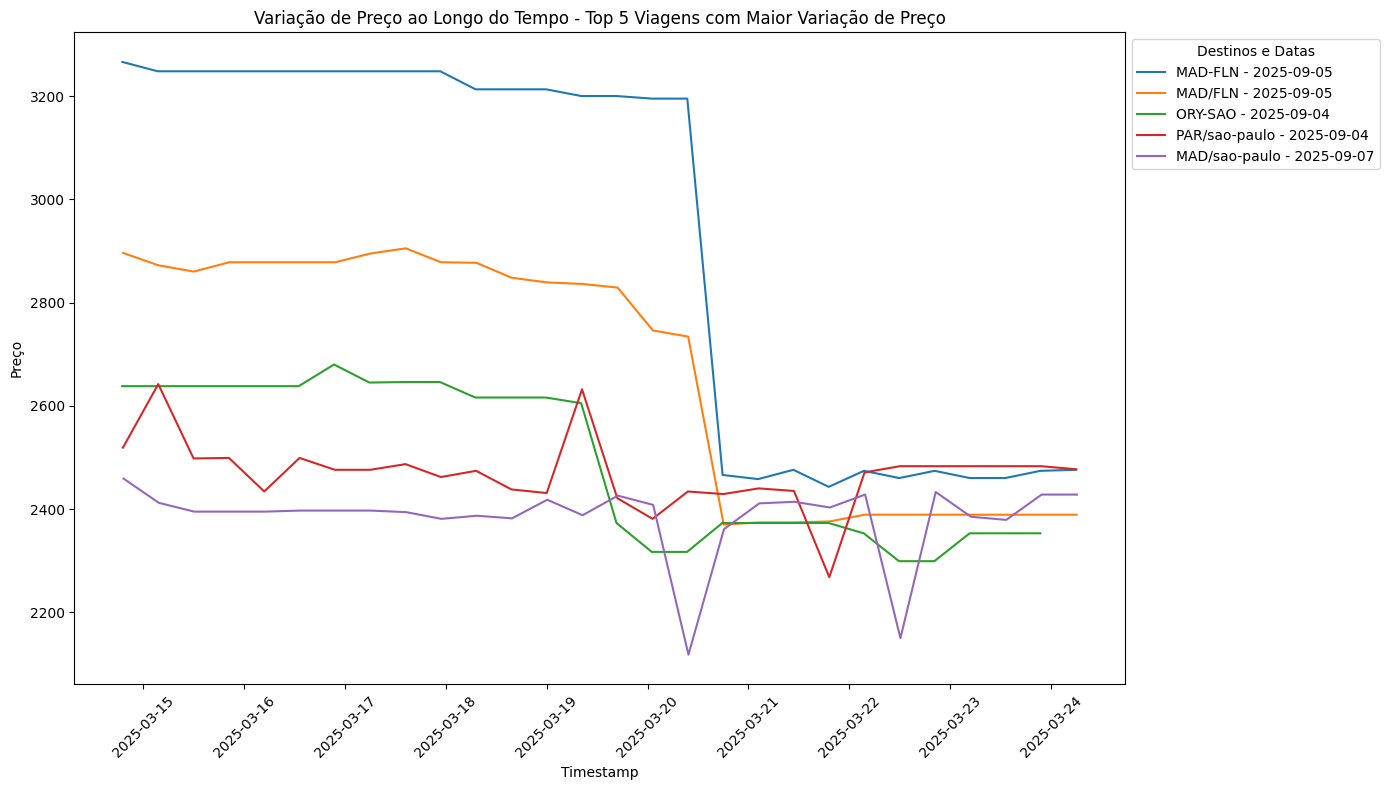

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dois arquivos CSV
kayak_df = pd.read_csv('euro_volta_kayak.csv') 
skiplagged_df = pd.read_csv('euro_volta_skip.csv')  

# Adicionar uma coluna para identificar a origem dos dados
kayak_df['source'] = 'Kayak'
skiplagged_df['source'] = 'Skiplagged'

# Função para extrair a data de viagem da URL
def extrair_data_viagem(url: str) -> str:
    """
    Função para extrair a data de viagem da URL dependendo do site.
    Para o Kayak, a data está no formato 'YYYY-MM-DD' após o destino.
    Para o Skiplagged, a data está no final da URL.
    """
    if "kayak" in url:
        return url.split('/')[-1].split('?')[0]  # Remove o parâmetro ?sort=price_a
    elif "skiplagged" in url:
        return url.split('/')[-1]
    return None

# Adicionar uma coluna de data de viagem
kayak_df['data_viagem'] = kayak_df['url'].apply(extrair_data_viagem)
skiplagged_df['data_viagem'] = skiplagged_df['url'].apply(extrair_data_viagem)

# Unir os dois dataframes
combined_df = pd.concat([kayak_df, skiplagged_df], ignore_index=True)

# Garantir que as colunas de 'timestamp' sejam do tipo datetime
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Filtrar pelos destinos de interesse
destinos = ['ORY-FLN', 'ORY-SAO', 'PAR/sao-paulo', 'PAR/FLN', "MAD/sao-paulo", "MAD/FLN", "MAD-SAO", "MAD-FLN"]
combined_df = combined_df[combined_df['destination'].isin(destinos)]

# Calcular a variação de preço para cada combinação de destino e data de viagem
price_variation = combined_df.groupby(['destination', 'data_viagem'])['price'].agg(['min', 'max'])

# Calcular a variação total de preço (máximo - mínimo) para cada destino e data de viagem
price_variation['variation'] = price_variation['max'] - price_variation['min']

# Selecionar as 5 viagens com maior variação de preço
top_5_viagens = price_variation['variation'].nlargest(5).index

# Filtrar os dados para as 5 viagens com maior variação de preço
top_5_df = combined_df[combined_df.set_index(['destination', 'data_viagem']).index.isin(top_5_viagens)]

# Plot usando matplotlib
plt.figure(figsize=(14, 8))

# Para cada viagem (destino e data), plotar a variação de preço ao longo do tempo
for (destino, data_viagem) in top_5_viagens:
    viagem_data = top_5_df[(top_5_df['destination'] == destino) & (top_5_df['data_viagem'] == data_viagem)]
    
    # Plotando a linha para cada viagem
    plt.plot(viagem_data['timestamp'], viagem_data['price'], label=f'{destino} - {data_viagem}')

# Adicionar título e rótulos aos eixos
plt.title('Variação de Preço ao Longo do Tempo - Top 5 Viagens com Maior Variação de Preço')
plt.xlabel('Timestamp')
plt.ylabel('Preço')

# Ajustar a posição da legenda para fora do gráfico
plt.legend(title='Destinos e Datas', bbox_to_anchor=(1, 1), loc='upper left')

# Exibir o gráfico
plt.xticks(rotation=45)  # Rotacionar os ticks do eixo x para melhor visualização
plt.tight_layout()  # Ajustar para não sobrepor os labels
plt.show()


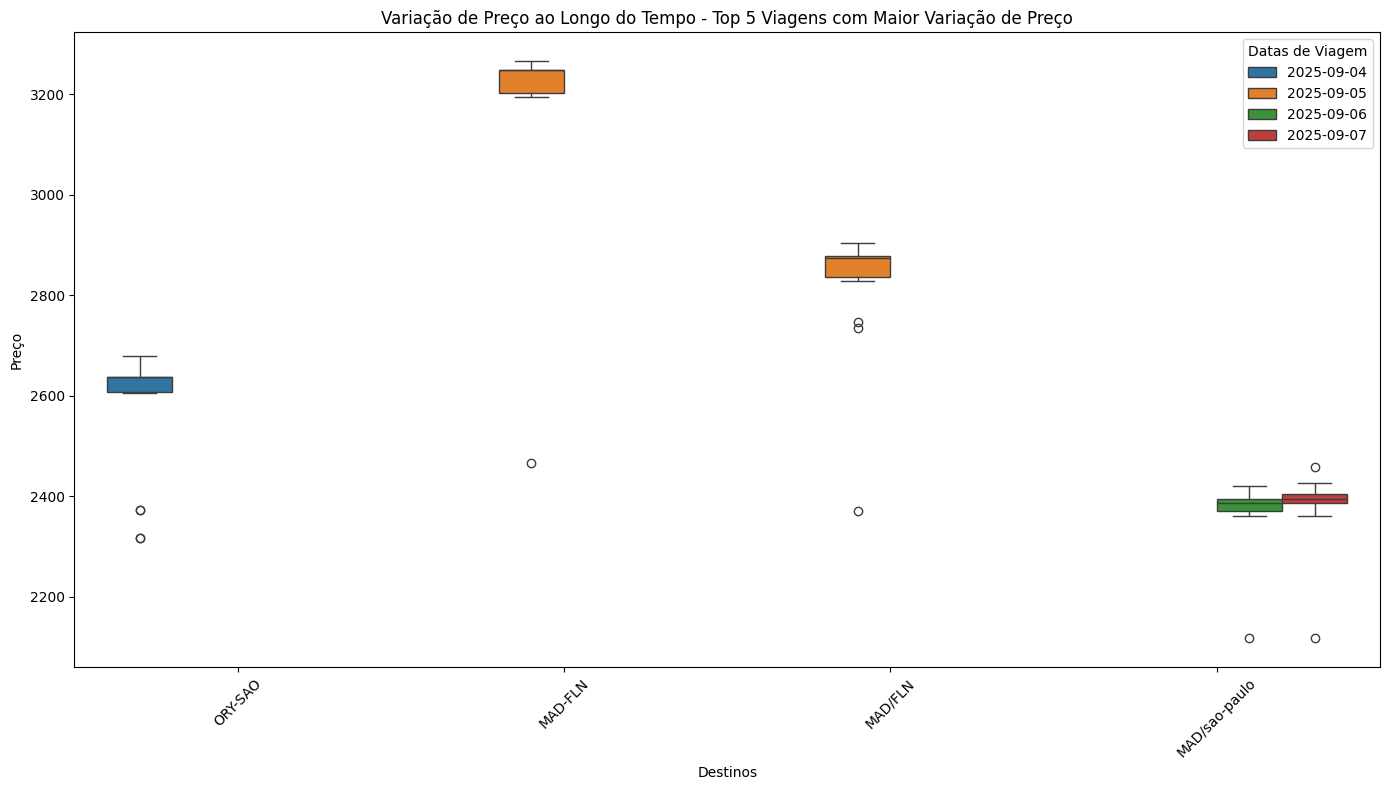

Percentual de variação para as 5 viagens com maior variação de preço:
destination    data_viagem
MAD-FLN        2025-09-05     32.441200
MAD/FLN        2025-09-05     22.573840
MAD/sao-paulo  2025-09-07     16.100094
ORY-SAO        2025-09-04     15.666811
MAD/sao-paulo  2025-09-06     14.305949
Name: percentual, dtype: float64


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dois arquivos CSV
kayak_df = pd.read_csv('euro_volta_kayak.csv') 
skiplagged_df = pd.read_csv('euro_volta_skip.csv')  

# Adicionar uma coluna para identificar a origem dos dados
kayak_df['source'] = 'Kayak'
skiplagged_df['source'] = 'Skiplagged'

# Função para extrair a data de viagem da URL
def extrair_data_viagem(url: str) -> str:
    if "kayak" in url:
        return url.split('/')[-1].split('?')[0]  # Remove o parâmetro ?sort=price_a
    elif "skiplagged" in url:
        return url.split('/')[-1]
    return None

# Adicionar uma coluna de data de viagem
kayak_df['data_viagem'] = kayak_df['url'].apply(extrair_data_viagem)
skiplagged_df['data_viagem'] = skiplagged_df['url'].apply(extrair_data_viagem)

# Unir os dois dataframes
combined_df = pd.concat([kayak_df, skiplagged_df], ignore_index=True)

# Garantir que as colunas de 'timestamp' sejam do tipo datetime
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Filtrar pelos destinos de interesse
destinos = ['ORY-FLN', 'ORY-SAO', 'PAR/sao-paulo', 'PAR/FLN', "MAD/sao-paulo", "MAD/FLN", "MAD-SAO", "MAD-FLN"]
combined_df = combined_df[combined_df['destination'].isin(destinos)]

# Calcular a variação de preço para cada combinação de destino e data de viagem
price_variation = combined_df.groupby(['destination', 'data_viagem'])['price'].agg(['min', 'max', 'median'])

# Calcular o percentual da variação (max - min) / min * 100
price_variation['percentual'] = ((price_variation['max'] - price_variation['min']) / price_variation['min']) * 100

# Selecionar as 5 viagens com maior variação de preço
top_5_viagens = price_variation['percentual'].nlargest(5).index

# Filtrar os dados para as 5 viagens com maior variação de preço
top_5_df = combined_df[combined_df.set_index(['destination', 'data_viagem']).index.isin(top_5_viagens)]

# Plot usando boxplot para as 5 viagens com maior variação de preço
plt.figure(figsize=(14, 8))

# Criar boxplot para as 5 viagens com maior variação de preço
sns.boxplot(x='destination', y='price', data=top_5_df, hue='data_viagem')

# Adicionar título e rótulos aos eixos
plt.title('Variação de Preço ao Longo do Tempo - Top 5 Viagens com Maior Variação de Preço')
plt.xlabel('Destinos')
plt.ylabel('Preço')

# Adicionar a legenda para mostrar a data
plt.legend(title='Datas de Viagem')

# Exibir o gráfico
plt.xticks(rotation=45)  # Rotacionar os ticks do eixo x para melhor visualização
plt.tight_layout()  # Ajustar para não sobrepor os labels
plt.show()

# Exibir os percentuais de variação para cada viagem
print("Percentual de variação para as 5 viagens com maior variação de preço:")
print(price_variation.loc[top_5_viagens, 'percentual'])


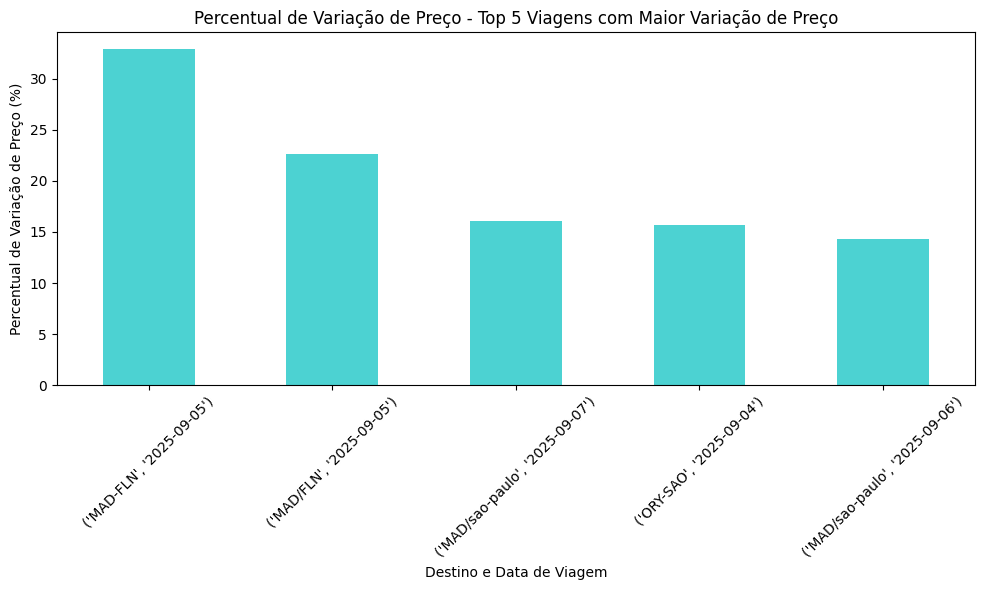

Percentual de variação para as 5 viagens com maior variação de preço:
destination    data_viagem
MAD-FLN        2025-09-05     32.872254
MAD/FLN        2025-09-05     22.573840
MAD/sao-paulo  2025-09-07     16.100094
ORY-SAO        2025-09-04     15.666811
MAD/sao-paulo  2025-09-06     14.305949
Name: percentual, dtype: float64


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dois arquivos CSV
kayak_df = pd.read_csv('euro_volta_kayak.csv') 
skiplagged_df = pd.read_csv('euro_volta_skip.csv')  

# Adicionar uma coluna para identificar a origem dos dados
kayak_df['source'] = 'Kayak'
skiplagged_df['source'] = 'Skiplagged'

# Função para extrair a data de viagem da URL
def extrair_data_viagem(url: str) -> str:
    if "kayak" in url:
        return url.split('/')[-1].split('?')[0]  # Remove o parâmetro ?sort=price_a
    elif "skiplagged" in url:
        return url.split('/')[-1]
    return None

# Adicionar uma coluna de data de viagem
kayak_df['data_viagem'] = kayak_df['url'].apply(extrair_data_viagem)
skiplagged_df['data_viagem'] = skiplagged_df['url'].apply(extrair_data_viagem)

# Unir os dois dataframes
combined_df = pd.concat([kayak_df, skiplagged_df], ignore_index=True)

# Garantir que as colunas de 'timestamp' sejam do tipo datetime
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Filtrar pelos destinos de interesse
destinos = ['ORY-FLN', 'ORY-SAO', 'PAR/sao-paulo', 'PAR/FLN', "MAD/sao-paulo", "MAD/FLN", "MAD-SAO", "MAD-FLN"]
combined_df = combined_df[combined_df['destination'].isin(destinos)]

# Calcular a variação de preço para cada combinação de destino e data de viagem
price_variation = combined_df.groupby(['destination', 'data_viagem'])['price'].agg(['min', 'max', 'median'])

# Calcular o percentual da variação (max - min) / min * 100
price_variation['percentual'] = ((price_variation['max'] - price_variation['min']) / price_variation['min']) * 100

# Selecionar as 5 viagens com maior variação de preço
top_5_viagens = price_variation['percentual'].nlargest(5).index

# Filtrar os dados para as 5 viagens com maior variação de preço
top_5_df = price_variation.loc[top_5_viagens]

# Plotar o gráfico de barras para as 5 viagens com maior variação
plt.figure(figsize=(10, 6))

# Gráfico de barras do percentual de variação de preço
top_5_df['percentual'].plot(kind='bar', color='c', alpha=0.7)

# Adicionar título e rótulos aos eixos
plt.title('Percentual de Variação de Preço - Top 5 Viagens com Maior Variação de Preço')
plt.xlabel('Destino e Data de Viagem')
plt.ylabel('Percentual de Variação de Preço (%)')

# Exibir o gráfico
plt.xticks(range(len(top_5_df)), top_5_df.index, rotation=45)  # Exibir os destinos e datas
plt.tight_layout()
plt.show()

# Exibir os percentuais de variação para as 5 viagens com maior variação de preço
print("Percentual de variação para as 5 viagens com maior variação de preço:")
print(top_5_df['percentual'])
